In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
import tensorflow as tf
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

In [3]:
# To download dataset from google drive folder


In [2]:
sample_size = 450
width = 150
height = 150

In [3]:
files = ['A', 'B', 'C']
file_path = "D:/TITO/Documents/BANGKIT/capstone/protoype2/data4/{}"
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(file_path.format(col))
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)
        if i.endswith('.png'):
            data[col].append(i)

In [4]:
print(len(data['A']))
print(len(data['B']))
print(len(data['C']))

150
151
150


In [5]:
pd.DataFrame(data).head()

ValueError: All arrays must be of the same length

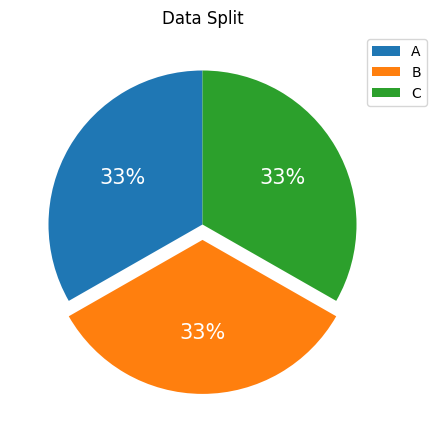

In [6]:
sizes = [len(data['A']), len(data['B']), len(data['C'])]
explode = (0, 0.1, 0) 

plt.figure(figsize=(10, 5), dpi=100)
plt.pie(x=sizes, autopct='%1.0f%%', shadow=False, textprops={'color': "w", "fontsize": 15}, startangle=90, explode=explode)
plt.legend(files, bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [7]:
start = time.time()
image_data = []
image_target = []

for title in files:
    os.chdir(file_path.format(title))
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
        if counter == sample_size:
            break
    clear_output(wait=True)
    print("Compiled Class",title)
calculate_time = time.time() - start
print("Calculate Time",round(calculate_time,5))

Compiled Class C
Calculate Time 11.8148


In [8]:
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(451, 150, 150, 3)

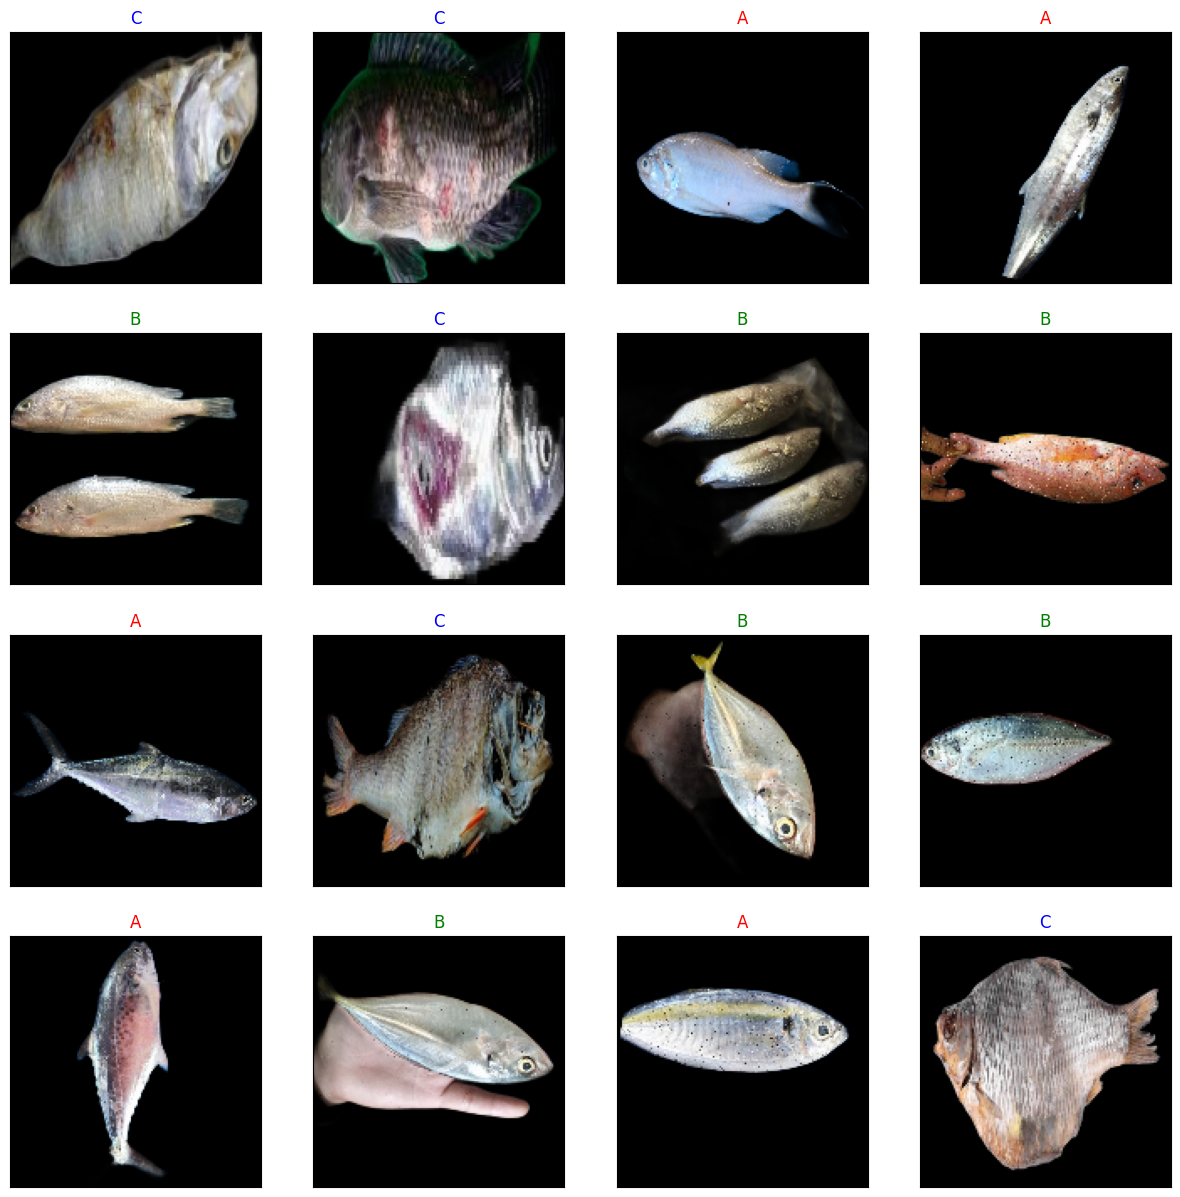

In [9]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='A':
        c='red'
    elif image_target[fig]=='B':
        c='green'
    else:
        c='blue'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [10]:
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [11]:
X = image_data / 255.0
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)


In [12]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(width, height, 3), include_top=False, weights='imagenet')
base_model.trainable = False

9420800/9406464 [==============================] - 4s 0us/step


In [39]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(3, activation='softmax')
# ])

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(3, activation='softmax')
])

In [40]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                patience=10,
                                                restore_best_weights=True)


In [41]:
# model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

# history = model.fit(train_images, train_labels, epochs=100,
#                     validation_data=(test_images, test_labels), callbacks=[callback])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0000001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

def lr_scheduler(epoch):
    return 0.001 * np.exp(-0.1 * epoch)

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Train the model
history = model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels), callbacks=[lr_callback, callback])

Epoch 1/100
10/10 [==============================] - 4s 197ms/step - loss: 1.3342 - accuracy: 0.5714 - val_loss: 0.8210 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 2/100
10/10 [==============================] - 1s 101ms/step - loss: 0.6961 - accuracy: 0.7016 - val_loss: 0.4571 - val_accuracy: 0.8088 - lr: 9.0484e-04
Epoch 3/100
10/10 [==============================] - 1s 101ms/step - loss: 0.5301 - accuracy: 0.7651 - val_loss: 0.4072 - val_accuracy: 0.8162 - lr: 8.1873e-04
Epoch 4/100
10/10 [==============================] - 1s 102ms/step - loss: 0.3903 - accuracy: 0.8159 - val_loss: 0.3794 - val_accuracy: 0.8309 - lr: 7.4082e-04
Epoch 5/100
10/10 [==============================] - 1s 101ms/step - loss: 0.3327 - accuracy: 0.8476 - val_loss: 0.3570 - val_accuracy: 0.8382 - lr: 6.7032e-04
Epoch 6/100
10/10 [==============================] - 1s 101ms/step - loss: 0.2849 - accuracy: 0.8698 - val_loss: 0.3354 - val_accuracy: 0.8456 - lr: 6.0653e-04
Epoch 7/100
10/10 [=========================

5/5 - 0s - loss: 0.2759 - accuracy: 0.9118 - 290ms/epoch - 58ms/step


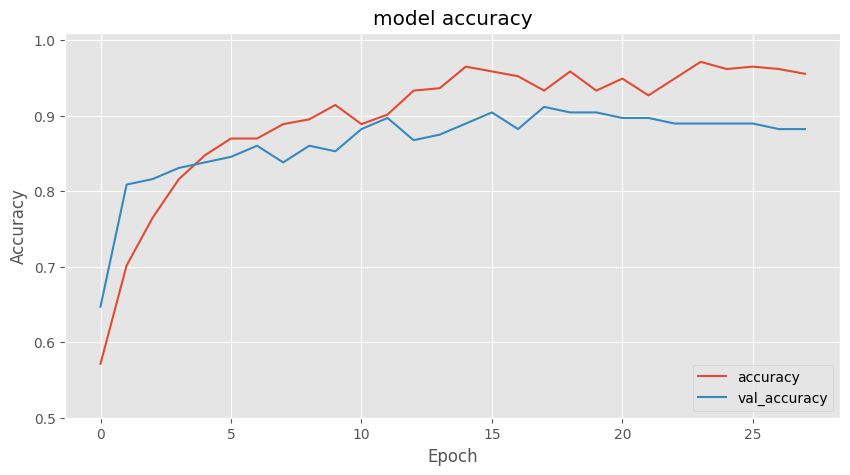

In [62]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('model accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

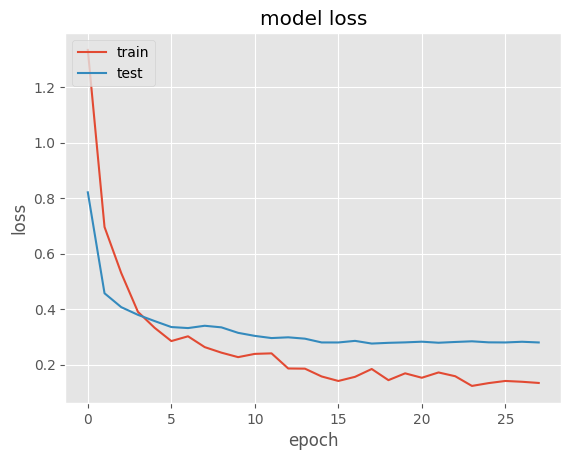

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
result=model.evaluate(test_images, test_labels)

5/5 [==============================] - 0s 55ms/step - loss: 0.2759 - accuracy: 0.9118


In [44]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.2758939862251282
accuracy : 0.9117646813392639


In [21]:
# model.summary()

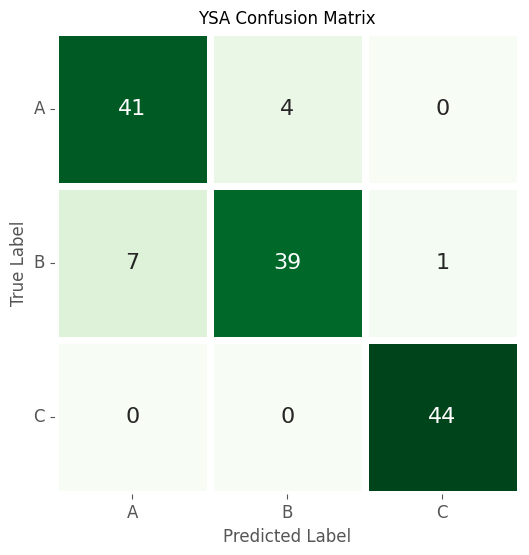

In [45]:
y_pred = model.predict(test_images)

def toClass(pred):

    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index

    return class_

cm = confusion_matrix(test_labels,toClass(y_pred))

df1 = pd.DataFrame(columns=["A","B", "C"], index= ["A","B", "C"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()

In [46]:
def Prediction(image):

    global width, height, files, labels

    img = cv2.resize(image,(width,height))

    test = img / 255.0

    pred = model.predict(np.array([image])).argmax()

    return labels.inverse_transform([pred])[0]

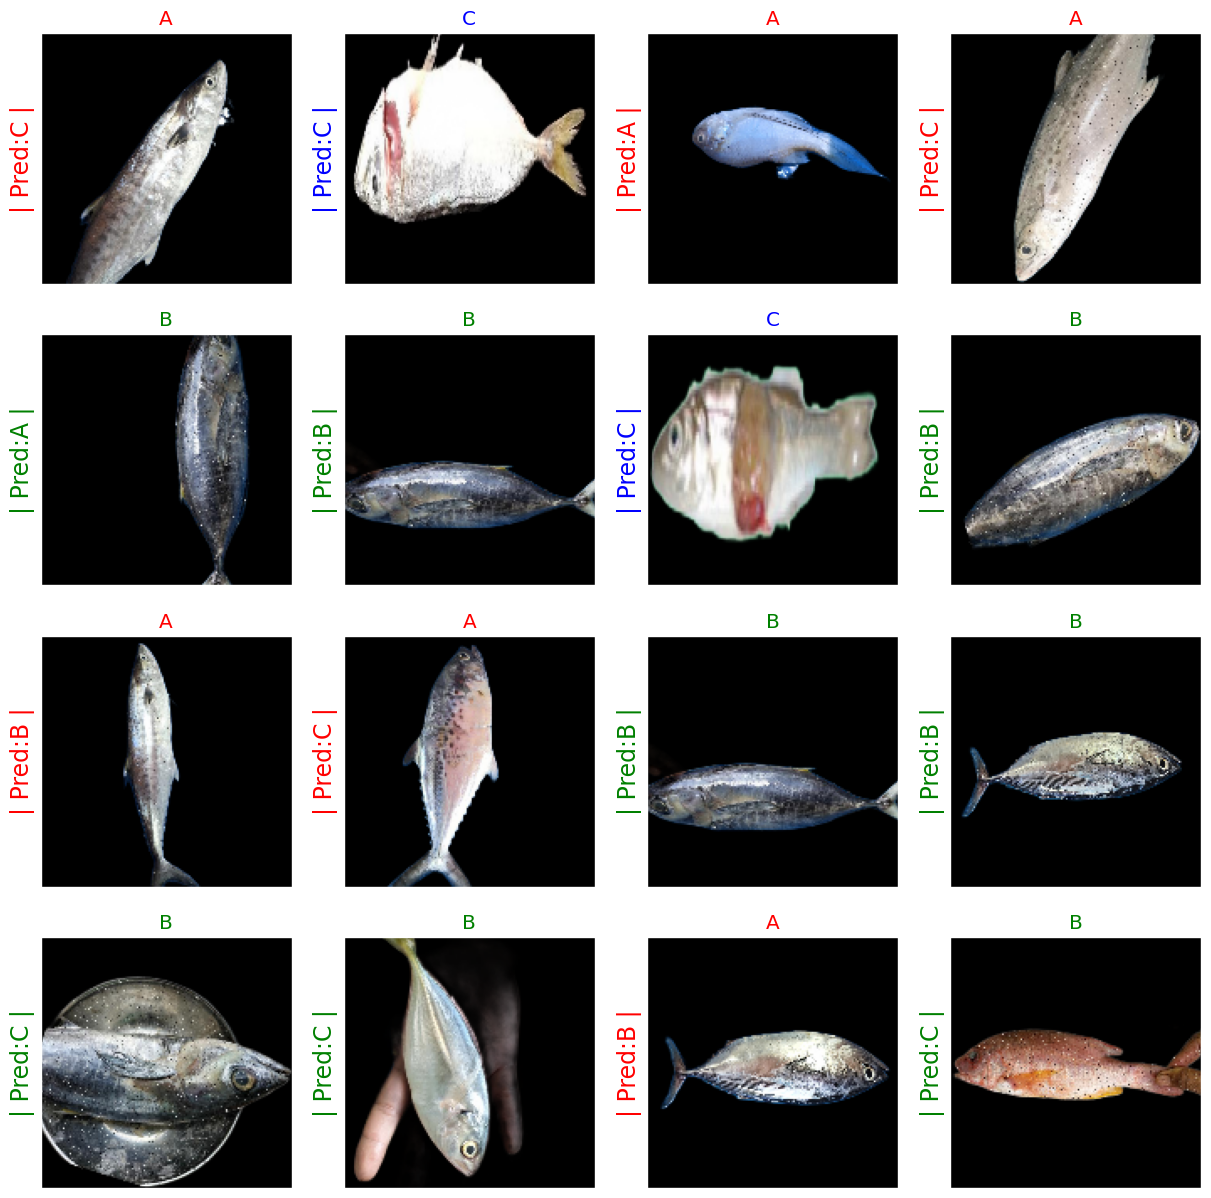

In [47]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='A':
        c='red'
    elif image_target[fig]=='B':
        c='green'
    else:
        c='blue'
    plt.title(image_target[fig], color=c)
    plt.ylabel("| Pred:{} |".format(Prediction(image_data[fig])),fontsize=17, color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [51]:
import os
import rembg

# input folder  = where is the image located
# output folder = pick the different folder
input_folder = "D:\\TITO\\Documents\\BANGKIT\\capstone\\protoype2\\test\\A"
output_folder = "D:\\TITO\\Documents\\BANGKIT\\capstone\\protoype2\\test\\A_rembg"

for index, file in enumerate(os.listdir(input_folder)):
    if file.endswith(('.png', '.jpg', '.jpeg')):
        name, ext = os.path.splitext(file)
        input_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, f"{name}-rem.png")
        
        with open(input_path, "rb") as inp:
            with open(output_path, "wb") as out:
                input_data = inp.read()
                output_data = rembg.remove(input_data)
                out.write(output_data)
        
        print(f'done {index+1}')

done 1
done 2
done 3
done 4
done 6
done 7


Prediction range:
Minimum value: 0.029099682
Maximum value: 0.8728604
Grade: C
Bad


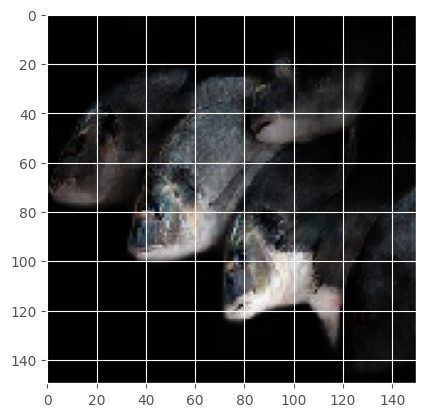

In [59]:


# user_path = r"C:\laragon\www\Project\Bloomy\img\output"
user_path = r"D:\\TITO\\Documents\\BANGKIT\\capstone\\protoype2\\test\\A_rembg"

image_files = os.listdir(user_path)

index = 0
image_file = os.path.join(user_path, image_files[index])

img = image.load_img(image_file, target_size=(150, 150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0 

classes = model.predict(x, batch_size=1)
nilai_min = np.min(classes)
nilai_max = np.max(classes)

print("Prediction range:")
print("Minimum value:", nilai_min)
print("Maximum value:", nilai_max)

class_list = ['A', 'B', 'C'] 

predicted_class = class_list[np.argmax(classes[0])]
print('Grade:', predicted_class)

if predicted_class == 'A':
    print('Good')
   

elif predicted_class == 'B':
    print('Medium')


elif predicted_class == 'C':
    print('Bad')

In [60]:
# file_location = 'D:\\Users\\Andra\Documents\\Bloomy\\prototype\\fish_grading.h5'
# file_location = 'C:\laragon\www\Project\Bloomy\model\\fishgrading.h5'
file_location = 'D:\\TITO\\Documents\\BANGKIT\\capstone\\protoype2\\fish_grading.h5'

model.save(file_location)